In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

Solve the equation:

\begin{equation}
n^n = \frac{2047^{{2047}^{2047}}}{2047^{{2047}^{2046}}}  .
\end{equation}

After some algebra, it can be seen that:

\begin{equation}
\log n + \log \log n = 2047 \log{2047} +\log {2046} + \log \log {2047}  .
\end{equation}

Set the right-hand-side to be $\alpha$, and it is calculated to be:

In [2]:
alpha = 2047*math.log(2047) + math.log(2046) + math.log(math.log(2047))
alpha

15616.250269089609

Let $x = \log n$. The equation becomes:

\begin{equation}
x + \log x - \alpha = 0 .
\end{equation}

In [3]:
f = lambda x: x + np.log(x) - alpha

In [4]:
x = np.linspace(10, 20000, 1000)
y = f(x)

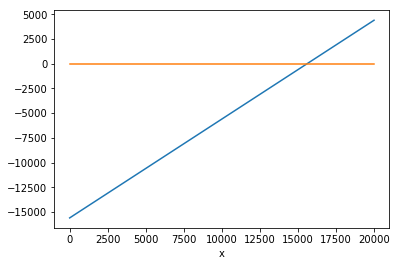

In [5]:
plt.plot(x, y)
plt.plot(x, np.zeros(len(x)))
plt.xlabel('x')

We can use Newton-Raphson method to solve this equation numerically. Recall:

\begin{equation}
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)},
\end{equation}

where $f(x) = x + \log x - \alpha$, and its derivative $f'(x) = 1+\frac{1}{x}$.

From the plot above, it would be nice to set the initial value $x_0 = 15000$.

In [6]:
# define the derivatives
df = lambda x: 1 + np.reciprocal(x)

In [7]:
from scipy.optimize import newton

In [8]:
sol = newton(f, 15000.0, fprime=df)
sol

15606.594820240816

Then we get the solution $x$, and we can restore $n$ by

\begin{equation}
n = e^x ,
\end{equation}

which induces an overflow error.

In [9]:
# Verify
sol + math.log(sol) - alpha

0.0